In [244]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

## Data Minyak Perusahaan Brent Oil

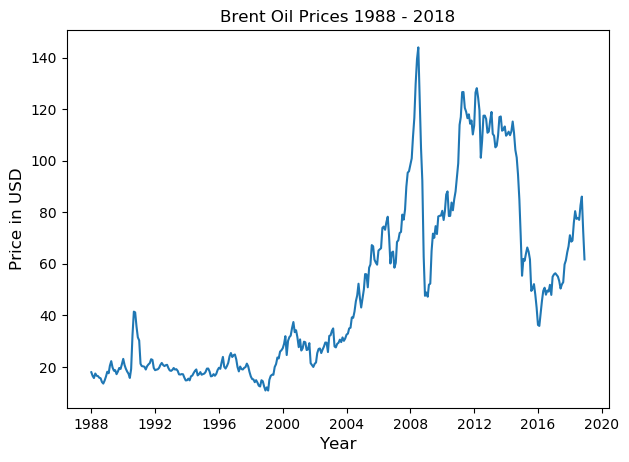

In [245]:
ts = pd.read_csv('oil_months.csv', parse_dates=[0], index_col=[0])

plt.figure(figsize=[7,5], dpi=100)

plt.plot(ts)

plt.title('Brent Oil Prices 1988 - 2018')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)

plt.show()

In [246]:
ts.head()

,Price
Date,
1988-01-01,17.95
1988-02-01,16.50
1988-03-01,15.70
1988-04-01,17.45
1988-05-01,16.60


In [247]:
ts.tail()

,Price
Date,
2018-08-01,77.05
2018-09-01,82.72
2018-10-01,86.07
2018-11-01,72.68
2018-12-01,61.71


## Fungsi auto_arima Untuk Mencari Parameter p,d,q

Untuk mencari parameter p,d,q dapat digunakan fungsi auto_arima, yang menjalankan metode ARIMA dengan berbagai orde pada data. Orde yang kemudian digunakan adalah yang memiliki nilai AIC terkecil

In [248]:
model = pm.auto_arima(ts.Price, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Fit ARIMA: order=(1, 1, 1); AIC=2148.791, BIC=2164.456, Fit time=0.155 seconds
Fit ARIMA: order=(0, 1, 0); AIC=2197.975, BIC=2205.807, Fit time=0.008 seconds
Fit ARIMA: order=(1, 1, 0); AIC=2146.893, BIC=2158.642, Fit time=0.021 seconds
Fit ARIMA: order=(0, 1, 1); AIC=2150.138, BIC=2161.887, Fit time=0.021 seconds
Fit ARIMA: order=(2, 1, 0); AIC=2148.805, BIC=2164.470, Fit time=0.053 seconds
Fit ARIMA: order=(2, 1, 1); AIC=2148.190, BIC=2167.771, Fit time=0.154 seconds
Total fit time: 0.439 seconds
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  371
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -1070.447
Method:                       css-mle   S.D. of innovations              4.333
Date:                Sat, 23 Nov 2019   AIC                           2146.893
Time:                        00:19:11   BIC                           2158.642
Sample:               

## Pembandingan Model Arima dan Data Tahun 2010 - 2018

Metode yang digunakan adalah Rolling Forecast, atau metode yang menggunakan prediksi ARIMA, lalu menggunakan data tahun itu yang sebenarnya untuk digunakan pada prediksi selanjutnya

Loading
............................................................................................................

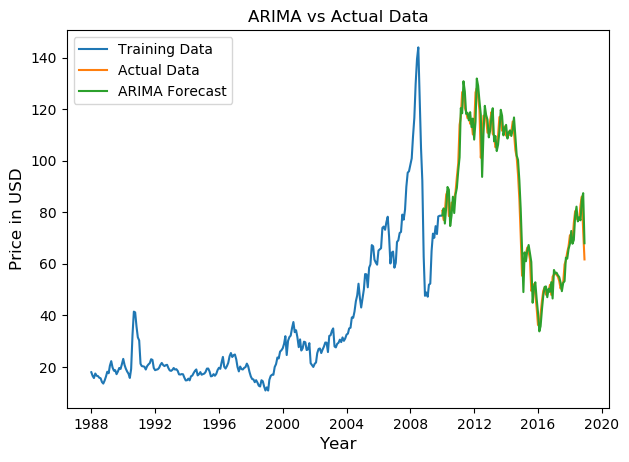

In [264]:
data = ts.Price.values

train = data[:264]
test = data[264:]

history = [x for x in train]
predictions = []

print('Loading')

for t in range(len(test)):
    model = ARIMA(history, order=[1, 1, 0]) # Training Data (WAJIB)
    
    fit = model.fit() # Fit Model (WAJIB)
    
    hasil = fit.forecast()[0] # Hasil prediksi
    
    predictions.append(hasil) # Tambahkan hasil ke list prediksi
    
    history.append(test[t]) # Tambahkan data tahun tersebut untuk ARIMA selanjutnya

    print('.', end='')

# print('predicted=%f, expected=%f' % (output, test[t])) Gunakan untuk melihat hasil prediksi

#----------------------------------------------Visualisation-------------------------------------#

plt.figure(figsize=[7,5], dpi=100)

train_df = pd.DataFrame(train, index=ts.index[0:264])
test_df = pd.DataFrame(test, index=ts.index[264:])
predictions_df = pd.DataFrame(predictions, index=ts.index[264:])

plt.plot(train_df, label='Training Data')
plt.plot(test_df, label='Actual Data')
plt.plot(predictions_df, label='ARIMA Forecast')

plt.title('ARIMA vs Actual Data')
plt.legend(fontsize=10)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.show()

## Prediksi Tahun-Tahun Selanjutnya

Prediksi 7 Tahun Kedepan (2019 - 2025)

In [289]:
data = ts.Price.values

train = [x for x in data]

model = ARIMA(train, order=(1, 1, 0)) 

fit = model.fit()

future_forecast = fit.forecast(steps=7)[0]

for i in range (2019, 2026):
    print('Tahun %d: %f' % (i, future_forecast[2020-i]))


Tahun 2019: 56.344540
Tahun 2020: 57.740945
Tahun 2021: 55.973036
Tahun 2022: 55.884855
Tahun 2023: 55.813913
Tahun 2024: 55.789883
Tahun 2025: 55.893512


Prediksi sampai 2050

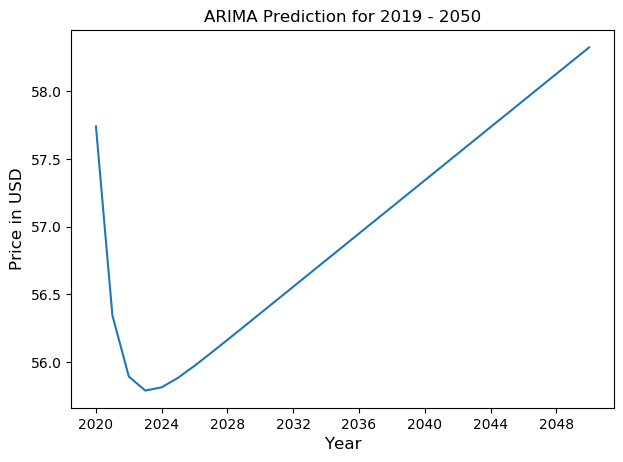

In [337]:
plt.figure(figsize=[7,5], dpi=100)

future_forecast = fit.forecast(steps=32)[0]

year = pd.date_range(start='2019', end='2050', freq='y')

future_df = pd.DataFrame(list(zip(year, future_forecast)), columns=['Date', 'Price'])

plt.plot(future_df.Date, future_df.Price)

plt.title('ARIMA Prediction for 2019 - 2050')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)

plt.show()


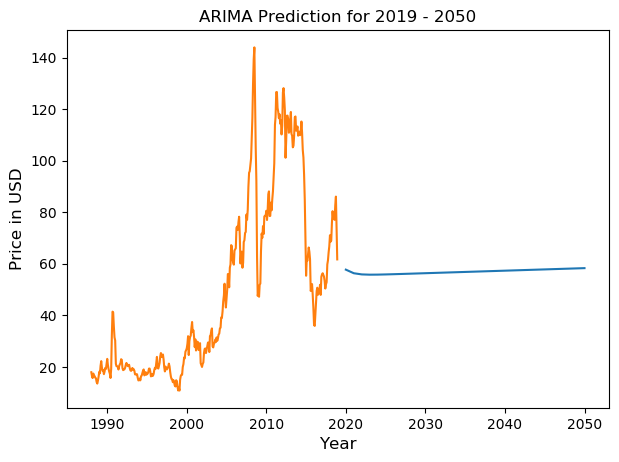

In [338]:
plt.figure(figsize=[7,5], dpi=100)

plt.plot(future_df.Date, future_df.Price)
plt.plot(ts)

plt.title('ARIMA Prediction for 2019 - 2050')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)

plt.show()